# Day 8 - Basic Credit Risk Modeling (Real Data)

## Learning Objectives
- Use real-world data to estimate Probability of Default (PD).
- Calculate Expected Loss (EL) using PD, LGD, and EAD.
- Understand logistic regression in credit risk context.

## Key Concepts
- Expected Loss (EL) = PD × LGD × EAD
- PD = Probability that a borrower defaults.
- LGD = Loss Given Default (portion of exposure lost if default occurs).
- EAD = Exposure at Default (amount at risk during default).

In [1]:
# Step 1: Load real credit risk data
import pandas as pd
from sklearn.datasets import fetch_openml

# Fetch German Credit dataset
data = fetch_openml('credit-g', version=1, as_frame=True)
portfolio = data.frame.copy()

# Define Default: 1 = bad credit (default), 0 = good credit
portfolio['Default'] = portfolio['class'].map({'bad': 1, 'good': 0})
portfolio.drop(columns='class', inplace=True)

# Assign Exposure at Default (EAD) from 'credit_amount'
portfolio['EAD'] = portfolio['credit_amount']

# Assign constant Loss Given Default (LGD), e.g., 45%
portfolio['LGD'] = 0.45

# Preview data
portfolio[['EAD', 'LGD', 'Default']].head()

,EAD,LGD,Default
0,1169,0.45,0
1,5951,0.45,1
2,2096,0.45,0
3,7882,0.45,0
4,4870,0.45,1


In [2]:
# Step 2: Estimate Probability of Default (PD) using logistic regression
import statsmodels.api as sm

# Use 'duration' and 'age' as predictors
X = portfolio[['duration', 'age']]
X = sm.add_constant(X)
y = portfolio['Default']

# Fit logistic regression
model = sm.Logit(y, X).fit()
portfolio['PD'] = model.predict(X)

# Preview estimated PD
portfolio[['PD', 'Default']].head()

Optimization terminated successfully.
         Current function value: 0.584599
         Iterations 5


,PD,Default
0,0.116467,0
1,0.591978,1
2,0.186660,0
3,0.431964,0
4,0.250647,1


In [3]:
# Step 3: Calculate Expected Loss (EL = PD × LGD × EAD)
portfolio['Expected_Loss'] = portfolio['PD'] * portfolio['LGD'] * portfolio['EAD']

# Portfolio-level Expected Loss
total_EL = portfolio['Expected_Loss'].sum()
print(f"Total Expected Loss for Portfolio: ${total_EL:,.2f}")

# Preview calculated values
portfolio[['EAD', 'LGD', 'PD', 'Expected_Loss', 'Default']].head()

Total Expected Loss for Portfolio: $518,111.08


,EAD,LGD,PD,Expected_Loss,Default
0,1169,0.45,0.116467,61.267518,0
1,5951,0.45,0.591978,1585.286479,1
2,2096,0.45,0.186660,176.058042,0
3,7882,0.45,0.431964,1532.132374,0
4,4870,0.45,0.250647,549.293002,1


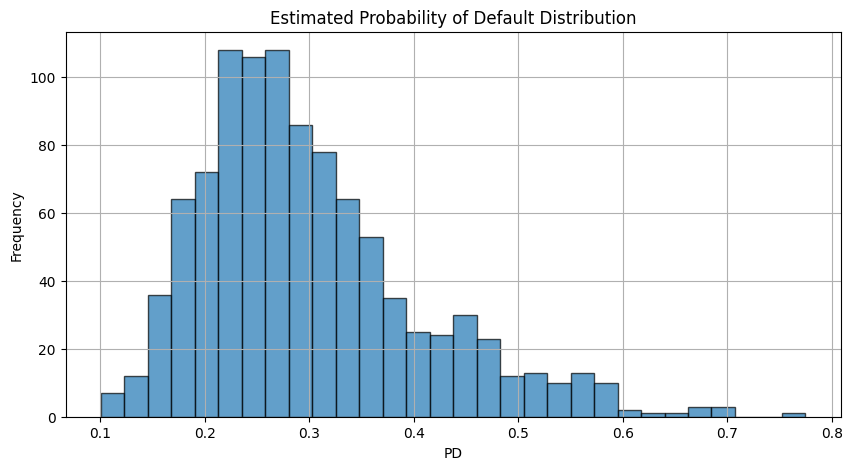

In [4]:
# Step 4: Visualize PD distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(portfolio['PD'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Estimated Probability of Default Distribution')
plt.xlabel('PD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()